### Attribute Information

- **time:** Time to failure or censoring
- **trt:** Treatment indicator 
  - 0 = ZDV only
  - 1 = ZDV + ddI
  - 2 = ZDV + Zal
  - 3 = ddI only
- **age:** Age (years) at baseline
- **wtkg:** Weight (kg) at baseline
- **hemo:** Hemophilia 
  - 0 = no
  - 1 = yes
- **homo:** Homosexual activity 
  - 0 = no
  - 1 = yes
- **drugs:** History of IV drug use 
  - 0 = no
  - 1 = yes
- **karnof:** Karnofsky score (on a scale of 0-100)
- **oprior:** Non-ZDV antiretroviral therapy pre-175 
  - 0 = no
  - 1 = yes
- **z30:** ZDV in the 30 days prior to 175 
  - 0 = no
  - 1 = yes
- **preanti:** Days pre-175 anti-retroviral therapy
- **race:** Race 
  - 0 = White
  - 1 = non-white
- **gender:** Gender 
  - 0 = Female
  - 1 = Male
- **str2:** Antiretroviral history 
  - 0 = naive
  - 1 = experienced
- **strat:** Antiretroviral history stratification 
  - 1 = 'Antiretroviral Naive'
  - 2 = '> 1 but <= 52 weeks of prior antiretroviral therapy'
  - 3 = '> 52 weeks'
- **symptom:** Symptomatic indicator 
  - 0 = asymptomatic
  - 1 = symptomatic
- **treat:** Treatment indicator 
  - 0 = ZDV only
  - 1 = others
- **offtrt:** Indicator of off-treatment before 96 ± 5 weeks 
  - 0 = no
  - 1 = yes
- **cd40:** CD4 count at baseline
- **cd420:** CD4 count at 20 ± 5 weeks
- **cd80:** CD8 count at baseline
- **cd820:** CD8 count at 20 ± 5 weeks
- **infected:** Is infected with AIDS 
  - 0 = No
  - 1 = Yes


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [2]:
aids = pd.read_csv('data/AIDS_Classification_50000.csv')

In [3]:
aids.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


In [4]:
aids.shape

(50000, 23)

In [5]:
aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


Zbiór danych nie posiada żadnych brakujących wartości, dzięki czemu nie będziemy musieli przeprowadzać imputacji brakujących danych

In [6]:
aids.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

Sprawdzamy które parametry są najbardziej skorelowane z infected

In [7]:
aids.corr().sort_values('infected',ascending=False)['infected']

infected    1.000000
strat       0.251951
z30         0.238531
str2        0.237749
preanti     0.172826
oprior      0.043416
age         0.028718
hemo        0.026407
symptom     0.024994
homo       -0.007341
cd80       -0.010172
cd820      -0.017166
gender     -0.022089
drugs      -0.025684
karnof     -0.025860
offtrt     -0.026563
race       -0.027914
trt        -0.047112
wtkg       -0.055527
treat      -0.056169
time       -0.102671
cd40       -0.140689
cd420      -0.183028
Name: infected, dtype: float64

In [8]:
class DataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformer, original_columns):
        self.transformer = transformer
        self.original_columns = original_columns
    
    def fit(self, X, y=None):
        self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        X_transformed = self.transformer.transform(X)
        if not isinstance(X_transformed, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=self.get_feature_names_out())
        
        original_data = X[self.original_columns]
        
        X_final = pd.concat([original_data.reset_index(drop=True), X_transformed.reset_index(drop=True)], axis=1)
        return X_final
    
    def get_feature_names_out(self):
        return self.transformer.get_feature_names_out()

In [9]:
cols_to_scale = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
cols_to_one_hot = ['trt', 'strat']
orginal_columns = [col for col in aids.columns if col not in (cols_to_scale + cols_to_one_hot)]

preprocessor = ColumnTransformer(transformers = [
    ('numerical', StandardScaler(), cols_to_scale),
    ('one_hot', OneHotEncoder(drop='first'), cols_to_one_hot)
])

pipe = Pipeline(steps = [
                ('preprocessor', DataFrameTransformer(preprocessor, orginal_columns)),
])

aids_t = pipe.fit_transform(aids)

In [10]:
aids_t

,hemo,homo,drugs,oprior,z30,race,gender,str2,symptom,treat,...,numerical__preanti,numerical__cd40,numerical__cd420,numerical__cd80,numerical__cd820,one_hot__trt_1,one_hot__trt_2,one_hot__trt_3,one_hot__strat_2,one_hot__strat_3
0,0,1,0,0,1,0,1,1,0,1,...,-0.744945,0.028485,0.213458,-0.335514,-0.447266,1.0,0.0,0.0,1.0,0.0
1,0,1,0,0,1,0,1,1,1,1,...,-0.233688,-1.473588,0.945475,-0.022383,1.822353,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,1,0,0,1,0,0,...,-0.789617,0.564940,-0.725733,0.206838,0.535941,1.0,0.0,0.0,0.0,0.0
3,0,1,0,1,1,0,1,1,0,0,...,0.483561,-0.790827,-0.787886,-0.554502,0.332823,0.0,0.0,1.0,0.0,1.0
4,0,1,0,0,0,0,1,0,0,0,...,-0.779690,1.764648,0.033907,1.135999,-0.167612,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,1,0,0,1,0,1,...,1.913094,-0.829842,-0.249232,-1.156205,0.318105,0.0,0.0,1.0,0.0,1.0
49996,0,1,0,0,1,1,1,1,0,0,...,-0.015287,0.486910,0.945475,-1.088667,-0.732809,0.0,0.0,0.0,0.0,1.0
49997,0,1,0,0,1,0,1,1,0,1,...,-0.789617,-0.108067,1.553187,1.095067,-0.126399,0.0,0.0,0.0,0.0,0.0
49998,0,0,0,0,1,1,0,1,0,1,...,-0.789617,0.291836,0.013189,-1.178718,-0.120512,0.0,0.0,0.0,0.0,0.0


<Axes: >

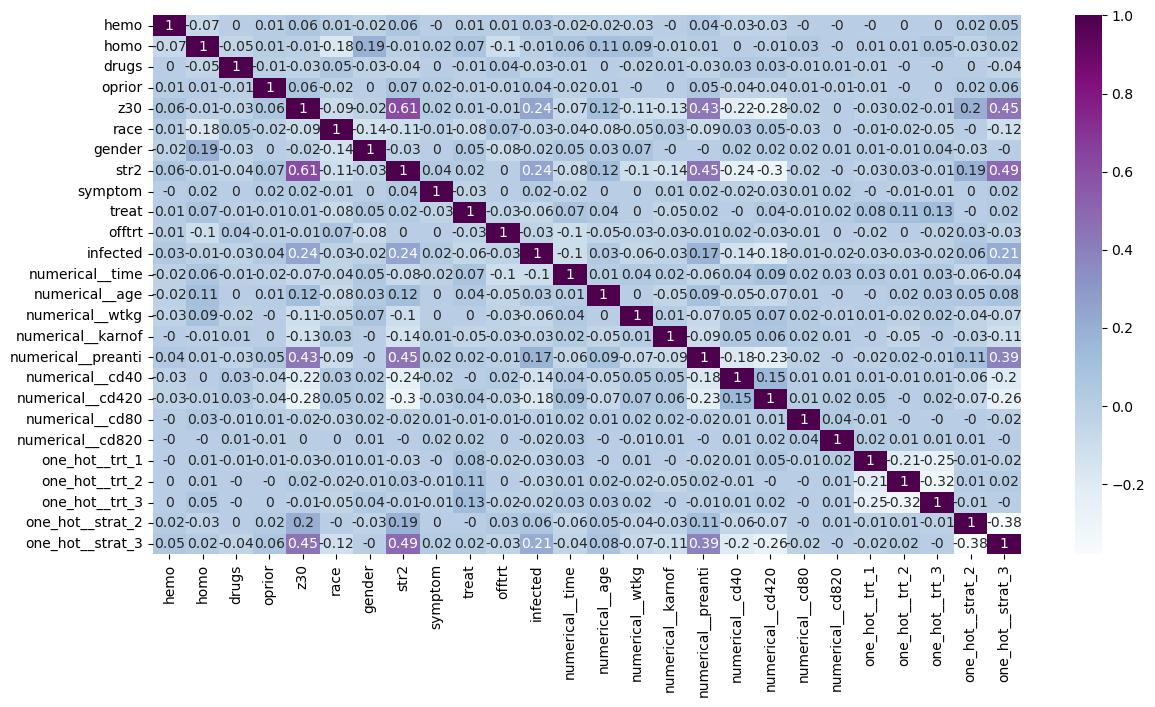

In [20]:
# correlation matrix

correlation = aids_t.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot=True, cmap='BuPu')

Splitting the data

In [13]:
X = aids_t.drop(columns=['infected'])
y = aids_t['infected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [13]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

In [14]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


# rf_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5]
# }

# dt_param_grid = {
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5]
# }


In [15]:
# Dopasowanie modeli
# rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
# dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)

# wyświetlanie progresu + użycie wszystkich dostępnych rdzeni procesora
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, verbose=2)
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Ocena modeli
rf_best_model = rf_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_

rf_predictions = rf_best_model.predict(X_test)
dt_predictions = dt_best_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_predictions))

print("Decision Tree Report:")
print(classification_report(y_test, dt_predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81      8613
           1       0.58      0.18      0.28      3887

    accuracy                           0.70     12500
   macro avg       0.65      0.56      0.55     12500
weighted avg       0.68      0.70      0.65     12500

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79      8613
           1       0.48      0.22      0.30      3887

    accuracy                           0.68     12500
   macro avg       0.60      0.56      0.55     12500
weighted avg       0.64      0.68      0.64     12500



In [16]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, verbose=2)
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, n_jobs=-1, verbose=2)


rf_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Wybór najlepszych cech za pomocą Feature Importance z Random Forest
rf_best_model = rf_grid_search.best_estimator_
feature_importances = rf_best_model.feature_importances_

selected_features = X_train.columns[feature_importances > 0.01]

# Udowy zestaw danych z wybranymi cechami 
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_best_model.fit(X_train_selected, y_train)
dt_best_model.fit(X_train_selected, y_train)

rf_predictions = rf_best_model.predict(X_test_selected)
dt_predictions = dt_best_model.predict(X_test_selected)

print("Random Forest Report:")
print(classification_report(y_test, rf_predictions))

print("Decision Tree Report:")
print(classification_report(y_test, dt_predictions))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      8613
           1       0.58      0.20      0.29      3887

    accuracy                           0.70     12500
   macro avg       0.65      0.56      0.55     12500
weighted avg       0.68      0.70      0.65     12500

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      8613
           1       0.49      0.23      0.31      3887

    accuracy                           0.69     12500
   macro avg       0.60      0.56      0.56     12500
weighted avg       0.65      0.69      0.65     12500



Neural network

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Definicja architektury sieci neuronowej
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predykcja na danych testowych
nn_probabilities = model.predict(X_test)
nn_predictions = (nn_probabilities > 0.5).astype(int)

# Wyświetlenie raportu klasyfikacji
print("Neural Network Report:")
print(classification_report(y_test, nn_predictions))


Epoch 1/10


c:\Users\Bartosz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6664 - loss: 0.6291 - val_accuracy: 0.7025 - val_loss: 0.5740
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6906 - loss: 0.5878 - val_accuracy: 0.7085 - val_loss: 0.5719
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6983 - loss: 0.5774 - val_accuracy: 0.7045 - val_loss: 0.5695
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6993 - loss: 0.5756 - val_accuracy: 0.7081 - val_loss: 0.5685
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7034 - loss: 0.5711 - val_accuracy: 0.7071 - val_loss: 0.5684
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6961 - loss: 0.5715 - val_accuracy: 0.7111 - val_loss: 0.5662
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7082 - loss: 0.5654 - val_accuracy: 0.7081 - val_loss: 0.5660
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7060 - loss: 0.5658 - val_accuracy: 0.7065 - val_

In [20]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Ocena modelu
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predykcja na danych testowych
nn_predictions = (model.predict(X_test) > 0.5).astype("int32")

# Wyświetlenie raportu klasyfikacji
print("Neural Network Report:")
print(classification_report(y_test, nn_predictions))

Epoch 1/20


c:\Users\Bartosz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6728 - loss: 0.6278 - val_accuracy: 0.6907 - val_loss: 0.5787
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6879 - loss: 0.5938 - val_accuracy: 0.7072 - val_loss: 0.5751
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6950 - loss: 0.5785 - val_accuracy: 0.7060 - val_loss: 0.5704
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.5757 - val_accuracy: 0.7072 - val_loss: 0.5779
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6952 - loss: 0.5795 - val_accuracy: 0.7068 - val_loss: 0.5693
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7059 - loss: 0.5667 - val_accuracy: 0.7068 - val_loss: 0.5702
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7015 - loss: 0.5708 - val_accuracy: 0.7072 - val_loss: 0.5677
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7064 - loss: 0.5701 - val_accuracy: 0.7077 - val_

: 